# Goal
### Clean and preprocess the collected data to remove errors, handle missing values, and transform it into a suitable format for analysis. 
**Tasks**: data cleaning, data integration, data transformation etc

### *2018 Data* 

In [2]:
import pandas as pd; #pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)
from datetime import datetime
import matplotlib.pyplot as plt
# read the 2018 baywheels data
baywheels_df = pd.read_csv('baywheels_2018', low_memory=False, index_col=0)

In [3]:
# convert the start_time and end_time object into datetime64 objects
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')

In [4]:
baywheels_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2018-04-26 18:04:41,2018-04-26 18:10:07,11.0,37.79728,-122.398436,6.0,37.80477,-122.403234,2530.0
1,2018-05-18 19:34:12,2018-05-18 19:37:57,64.0,37.7767539,-122.3990176,321.0,37.7801457035,-122.4030708524,3643.0
2,2018-07-14 14:57:05,2018-07-14 15:10:37,70.0,37.7733108789,-122.4442926049,109.0,37.7633158,-122.4219039,1964.0
3,2018-11-11 16:35:22,2018-11-11 16:45:37,160.0,37.8053183,-122.2948365,220.0,37.8113514,-122.2734217,3580.0
4,2018-12-15 10:15:24,2018-12-15 10:20:23,72.0,37.772406,-122.4356498,119.0,37.7610471,-122.4326417,5247.0
...,...,...,...,...,...,...,...,...,...
1863726,2018-05-09 08:23:45,2018-05-09 08:29:02,30.0,37.776598,-122.395282,36.0,37.78383,-122.39887,369.0
1863727,2018-12-22 19:28:59,2018-12-22 19:40:22,146.0,37.7423139,-122.4231805,98.0,37.765052,-122.4218661,2940.0
1863728,2018-05-05 10:49:33,2018-05-05 11:03:30,122.0,37.760299,-122.418892,121.0,37.7592103,-122.4213392,2095.0
1863729,2018-05-09 08:55:21,2018-05-09 09:11:35,25.0,37.7875217805,-122.3974049091,123.0,37.7605936,-122.4148171,3570.0


### Handling missing values

In [5]:
# number of Na values 
baywheels_df.isna().sum().sum()

23562

In [6]:
baywheels_df.dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
start_station_id             object
start_station_lat            object
start_station_lon            object
end_station_id               object
end_station_lat              object
end_station_lon              object
bike_id                      object
dtype: object

In [7]:
baywheels_df.dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
start_station_id             object
start_station_lat            object
start_station_lon            object
end_station_id               object
end_station_lat              object
end_station_lon              object
bike_id                      object
dtype: object

In [8]:
baywheels_df.head(2)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2018-04-26 18:04:41,2018-04-26 18:10:07,11.0,37.79728,-122.398436,6.0,37.80477,-122.403234,2530.0
1,2018-05-18 19:34:12,2018-05-18 19:37:57,64.0,37.7767539,-122.3990176,321.0,37.7801457035,-122.4030708524,3643.0


In [9]:
#identify the NaT values in start_time
na_start_values = baywheels_df['start_time'].isna()
na_start_rows = baywheels_df[na_start_values]

na_start_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
439433,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
481488,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
689379,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
896954,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
959289,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1291280,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1500621,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1525798,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1604523,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1861419,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [10]:
#identify the NaT values in end_time
na_end_values = baywheels_df['end_time'].isna()
na_end_rows = baywheels_df[na_end_values]

na_end_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
439433,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
481488,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
689379,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
896954,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
959289,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1291280,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1500621,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1525798,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1604523,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1861419,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [11]:
na_rows = pd.concat([na_start_rows, na_end_rows])

na_rows # the rows with missing values are the same for both columns (10 rows)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
439433,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
481488,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
689379,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
896954,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
959289,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1291280,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1500621,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1525798,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1604523,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1861419,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [12]:
# check the start_time column
baywheels_df['start_time']

0         2018-04-26 18:04:41
1         2018-05-18 19:34:12
2         2018-07-14 14:57:05
3         2018-11-11 16:35:22
4         2018-12-15 10:15:24
                  ...        
1863726   2018-05-09 08:23:45
1863727   2018-12-22 19:28:59
1863728   2018-05-05 10:49:33
1863729   2018-05-09 08:55:21
1863730   2018-02-08 18:01:18
Name: start_time, Length: 1863731, dtype: datetime64[ns]

In [13]:
# drop the NaT values
baywheels_df.dropna(subset=['start_time'], inplace=True)

In [14]:
# check the start_time column after dropna
baywheels_df['start_time']

0         2018-04-26 18:04:41
1         2018-05-18 19:34:12
2         2018-07-14 14:57:05
3         2018-11-11 16:35:22
4         2018-12-15 10:15:24
                  ...        
1863726   2018-05-09 08:23:45
1863727   2018-12-22 19:28:59
1863728   2018-05-05 10:49:33
1863729   2018-05-09 08:55:21
1863730   2018-02-08 18:01:18
Name: start_time, Length: 1863721, dtype: datetime64[ns]

In [15]:
# add a column 'duration' to baywheels_df
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['trip_duration'] = pd.DataFrame(length_of_trip)


In [16]:
baywheels_df.head(2)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
0,2018-04-26 18:04:41,2018-04-26 18:10:07,11.0,37.79728,-122.398436,6.0,37.80477,-122.403234,2530.0,0 days 00:05:26
1,2018-05-18 19:34:12,2018-05-18 19:37:57,64.0,37.7767539,-122.3990176,321.0,37.7801457035,-122.4030708524,3643.0,0 days 00:03:45


In [17]:
# duration column is a time delta object
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   object         
 3   start_station_lat  object         
 4   start_station_lon  object         
 5   end_station_id     object         
 6   end_station_lat    object         
 7   end_station_lon    object         
 8   bike_id            object         
 9   trip_duration      timedelta64[ns]
dtypes: datetime64[ns](2), object(7), timedelta64[ns](1)
memory usage: 156.4+ MB


In [18]:
# show min, max, mean values 
min = baywheels_df['trip_duration'].min()
mean = baywheels_df['trip_duration'].mean()
max = baywheels_df['trip_duration'].max()
print('min:',min)
print('max:',max)
print('mean:',mean)

min: -1 days +23:02:51
max: 0 days 23:59:26
mean: 0 days 00:14:17.797020047


In [19]:
pd.Timedelta(0)


Timedelta('0 days 00:00:00')

In [20]:
# show negative duration values 
negative_values = baywheels_df[baywheels_df['trip_duration'] < pd.Timedelta(0)]
negative_values #the durations are negative because of the change between summer time and
                #winter time at Sunday 4th November

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
223042,2018-11-04 01:48:20,2018-11-04 01:02:58,59.0,37.774814,-122.418954,27.0,37.7880593,-122.3918648,2331.0,-1 days +23:14:38
840962,2018-11-04 01:52:40,2018-11-04 01:02:27,375.0,37.7748362941,-122.4465456605,95.0,37.7662185,-122.4310597,3144.0,-1 days +23:09:47
1129000,2018-11-04 01:51:00,2018-11-04 01:06:56,183.0,37.8087021,-122.2699271,149.0,37.8312752,-122.2856333,417.0,-1 days +23:15:56
1131781,2018-11-04 01:59:54,2018-11-04 01:07:50,67.0,37.7766392,-122.3955263,37.0,37.7849997283,-122.3959356175,1497.0,-1 days +23:07:56
1238539,2018-11-04 01:58:47,2018-11-04 01:01:38,132.0,37.7518194,-122.4266139,134.0,37.7524278,-122.4206278,2487.0,-1 days +23:02:51
1511289,2018-11-04 01:59:01,2018-11-04 01:02:48,41.0,37.78127,-122.41874,61.0,37.7765126,-122.4113061,2136.0,-1 days +23:03:47


In [21]:
# add 1 hour to the affected columns
rows_to_add_1hour = [223042, 840962, 1129000, 1131781, 1238539, 1511289]
for row_index in rows_to_add_1hour:
    baywheels_df.loc[row_index, 'end_time'] += pd.Timedelta(hours=1)
    print(baywheels_df.loc[row_index, 'end_time'])

2018-11-04 02:02:58
2018-11-04 02:02:27
2018-11-04 02:06:56
2018-11-04 02:07:50
2018-11-04 02:01:38
2018-11-04 02:02:48


In [22]:
# update the duration column
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['trip_duration'] = pd.DataFrame(length_of_trip)

In [23]:
#check if it worked
negative_values = baywheels_df[baywheels_df['trip_duration'] < pd.Timedelta(0)]
negative_values

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration


In [24]:
# check the minimum again
min = baywheels_df['trip_duration'].min()
min

Timedelta('0 days 00:01:01')

In [25]:
# show positive duration values
positive_values = baywheels_df[baywheels_df['trip_duration'] > pd.Timedelta(0)]
positive_values

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
0,2018-04-26 18:04:41,2018-04-26 18:10:07,11.0,37.79728,-122.398436,6.0,37.80477,-122.403234,2530.0,0 days 00:05:26
1,2018-05-18 19:34:12,2018-05-18 19:37:57,64.0,37.7767539,-122.3990176,321.0,37.7801457035,-122.4030708524,3643.0,0 days 00:03:45
2,2018-07-14 14:57:05,2018-07-14 15:10:37,70.0,37.7733108789,-122.4442926049,109.0,37.7633158,-122.4219039,1964.0,0 days 00:13:32
3,2018-11-11 16:35:22,2018-11-11 16:45:37,160.0,37.8053183,-122.2948365,220.0,37.8113514,-122.2734217,3580.0,0 days 00:10:15
4,2018-12-15 10:15:24,2018-12-15 10:20:23,72.0,37.772406,-122.4356498,119.0,37.7610471,-122.4326417,5247.0,0 days 00:04:59
...,...,...,...,...,...,...,...,...,...,...
1863726,2018-05-09 08:23:45,2018-05-09 08:29:02,30.0,37.776598,-122.395282,36.0,37.78383,-122.39887,369.0,0 days 00:05:17
1863727,2018-12-22 19:28:59,2018-12-22 19:40:22,146.0,37.7423139,-122.4231805,98.0,37.765052,-122.4218661,2940.0,0 days 00:11:23
1863728,2018-05-05 10:49:33,2018-05-05 11:03:30,122.0,37.760299,-122.418892,121.0,37.7592103,-122.4213392,2095.0,0 days 00:13:57
1863729,2018-05-09 08:55:21,2018-05-09 09:11:35,25.0,37.7875217805,-122.3974049091,123.0,37.7605936,-122.4148171,3570.0,0 days 00:16:14


In [26]:
#check bike_id for Nan Values
baywheels_df['bike_id'].describe()

count     1863721
unique       5054
top        3961.0
freq         1220
Name: bike_id, dtype: object

In [27]:
#check nan values in bike_id 
nan_bike_id = baywheels_df['bike_id'].isna()
nan_bike_id_rows = baywheels_df[nan_bike_id]
nan_bike_id_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration


In [28]:
#check nan values in start_station_id
nan_start_station_id = baywheels_df['start_station_id'].isna()
nan_start_station_id_rows = baywheels_df[nan_start_station_id]
nan_start_station_id_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
401,2018-11-17 13:41:26,2018-11-17 13:44:57,NaN,37.41,-121.95,NaN,37.41,-121.94,4256.0,0 days 00:03:31
532,2018-07-18 21:16:40,2018-07-18 21:20:22,NaN,37.41,-121.95,NaN,37.42,-121.95,4205.0,0 days 00:03:42
674,2018-09-28 09:14:06,2018-09-28 09:23:57,NaN,37.41,-121.96,NaN,37.4,-121.94,4148.0,0 days 00:09:51
825,2018-06-19 19:07:49,2018-06-19 19:50:04,NaN,37.4,-121.93,NaN,37.39,-121.94,4083.0,0 days 00:42:15
941,2018-07-21 09:21:19,2018-07-21 09:30:13,NaN,37.4,-121.94,NaN,37.4,-121.93,4288.0,0 days 00:08:54
...,...,...,...,...,...,...,...,...,...,...
1863397,2018-08-06 19:16:48,2018-08-06 19:22:06,NaN,37.39,-121.93,NaN,37.38,-121.93,4152.0,0 days 00:05:18
1863454,2018-07-16 19:28:52,2018-07-16 19:58:28,NaN,37.41,-121.94,NaN,37.41,-121.95,4117.0,0 days 00:29:36
1863465,2018-07-27 14:48:18,2018-07-27 15:19:20,NaN,37.33,-121.91,NaN,37.35,-121.9,4097.0,0 days 00:31:02
1863492,2018-08-16 19:27:19,2018-08-16 19:42:18,NaN,37.41,-121.96,NaN,37.4,-121.93,4128.0,0 days 00:14:59


In [29]:
#fill in NaN values in start_station_id and end_station_id by comparing the latitude and longitude
from scipy.spatial import cKDTree

def fill_nan_station_ids(df):
    stations = df[['start_station_id', 'start_station_lat', 'start_station_lon']].copy()
    stations.dropna(subset=['start_station_id'], inplace=True)
    station_coords = stations[['start_station_lat', 'start_station_lon']].values
    station_ids = stations['start_station_id'].values
    tree = cKDTree(station_coords)

    nan_start_station_mask = df['start_station_id'].isnull()
    start_station_coords = df.loc[nan_start_station_mask, ['start_station_lat', 'start_station_lon']].values
    _, nearest_station_indices = tree.query(start_station_coords)
    nearest_station_ids = station_ids[nearest_station_indices]
    df.loc[nan_start_station_mask, 'start_station_id'] = nearest_station_ids

    stations = df[['end_station_id', 'end_station_lat', 'end_station_lon']].copy()
    stations.dropna(subset=['end_station_id'], inplace=True)
    station_coords = stations[['end_station_lat', 'end_station_lon']].values
    station_ids = stations['end_station_id'].values
    tree = cKDTree(station_coords)

    nan_end_station_mask = df['end_station_id'].isnull()
    end_station_coords = df.loc[nan_end_station_mask, ['end_station_lat', 'end_station_lon']].values
    _, nearest_station_indices = tree.query(end_station_coords)
    nearest_station_ids = station_ids[nearest_station_indices]
    df.loc[nan_end_station_mask, 'end_station_id'] = nearest_station_ids

    return df

# Apply the function to fill NaN station IDs in baywheels_df
baywheels_df = fill_nan_station_ids(baywheels_df)
####disclaimer!####
####this code has been provided by ChatGPT####

In [30]:
#check again if the fill worked
nan_start_station_id = baywheels_df['start_station_id'].isna()
nan_start_station_id_rows = baywheels_df[nan_start_station_id]
nan_start_station_id_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration


In [31]:
#check again if the fill worked
nan_end_station_id = baywheels_df['end_station_id'].isna()
nan_end_station_id_rows = baywheels_df[nan_end_station_id]
nan_end_station_id_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration


In [32]:
#check the row 401 if it still contains the NaN values
row_401 = baywheels_df.iloc[532]
row_401

start_time           2018-07-18 21:16:40
end_time             2018-07-18 21:20:22
start_station_id                   303.0
start_station_lat                  37.41
start_station_lon                -121.95
end_station_id                     303.0
end_station_lat                    37.42
end_station_lon                  -121.95
bike_id                           4205.0
trip_duration            0 days 00:03:42
Name: 532, dtype: object

In [33]:
#check nan values in start_station_lon
nan_start_station_lon = baywheels_df['start_station_lon'].isna()
nan_start_station_lon_rows = baywheels_df[nan_start_station_lon]
nan_start_station_lon_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration


In [34]:
#check nan values in start_station_lat
nan_start_station_lat = baywheels_df['start_station_lat'].isna()
nan_start_station_lat_rows = baywheels_df[nan_start_station_lat]
nan_start_station_lat_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration


In [35]:
#show most and least used stations by looking at number of trips started
baywheels_df['start_station_id'].value_counts().head() #remove .head() to see the whole list

15.0    38461
67.0    37617
30.0    35092
58.0    34918
81.0    33716
Name: start_station_id, dtype: int64

In [36]:
baywheels_df['start_station_id'].describe()

count     1863721
unique        331
top          15.0
freq        38461
Name: start_station_id, dtype: object

In [37]:
baywheels_df['end_station_id'].describe()

count     1863721
unique        331
top          67.0
freq        50000
Name: end_station_id, dtype: object

In [38]:
baywheels_df['end_station_id'].value_counts().head() #.head() to see the whole list

67.0    50000
15.0    44113
30.0    42970
6.0     39222
21.0    35955
Name: end_station_id, dtype: int64

In [39]:
#convert values to correct data type
baywheels_df['start_station_id'] = baywheels_df['start_station_id'].astype(float).astype(int)
baywheels_df['end_station_id'] = baywheels_df['end_station_id'].astype(float).astype(int)
baywheels_df['bike_id'] = baywheels_df['bike_id'].astype(float).astype(int)

baywheels_df['start_station_lat'] = baywheels_df['start_station_lat'].astype(float)
baywheels_df['start_station_lon'] = baywheels_df['start_station_lon'].astype(float)
baywheels_df['end_station_lat'] = baywheels_df['end_station_lat'].astype(float)
baywheels_df['end_station_lon'] = baywheels_df['end_station_lon'].astype(float)
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   int64          
 3   start_station_lat  float64        
 4   start_station_lon  float64        
 5   end_station_id     int64          
 6   end_station_lat    float64        
 7   end_station_lon    float64        
 8   bike_id            int64          
 9   trip_duration      timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), timedelta64[ns](1)
memory usage: 220.9 MB


### checking outliers

In [40]:
outlier_start_lon = baywheels_df.nlargest(10,'start_station_lon')
outlier_start_lon

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
370223,2018-08-20 12:07:06,2018-08-20 12:24:09,374,45.50,-73.57,374,45.51,-73.57,4425,0 days 00:17:03
786068,2018-08-20 09:53:14,2018-08-20 09:54:48,374,45.51,-73.57,374,45.51,-73.57,4425,0 days 00:01:34
1027361,2018-08-21 12:11:52,2018-08-21 12:20:13,374,45.50,-73.57,374,45.51,-73.57,4425,0 days 00:08:21
1252096,2018-06-29 08:57:14,2018-06-29 09:01:57,374,45.51,-73.57,374,45.51,-73.57,4295,0 days 00:04:43
1326974,2018-06-11 08:23:37,2018-06-11 08:26:48,374,45.51,-73.57,374,45.51,-73.57,4295,0 days 00:03:11
1727793,2018-06-22 13:36:13,2018-06-22 14:00:16,374,45.51,-73.57,374,45.51,-73.57,4295,0 days 00:24:03
1141648,2018-06-01 13:51:52,2018-06-01 13:53:58,374,40.66,-74.01,374,40.66,-74.01,4297,0 days 00:02:06
1350024,2018-06-01 13:56:04,2018-06-01 13:57:13,374,40.66,-74.01,374,40.66,-74.01,4297,0 days 00:01:09
1707396,2018-06-01 13:47:53,2018-06-01 13:49:00,374,40.66,-74.01,374,40.66,-74.01,4297,0 days 00:01:07
585120,2018-06-26 10:59:12,2018-06-26 14:34:57,374,44.95,-93.22,374,44.95,-93.22,3758,0 days 03:35:45


In [41]:
#checking for outliers in location data start_station_lon
outlier_start_lon = baywheels_df['start_station_lon'].max()
row_with_outlier = baywheels_df[baywheels_df['start_station_lon'] == outlier_start_lon]
row_with_outlier

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
370223,2018-08-20 12:07:06,2018-08-20 12:24:09,374,45.50,-73.57,374,45.51,-73.57,4425,0 days 00:17:03
786068,2018-08-20 09:53:14,2018-08-20 09:54:48,374,45.51,-73.57,374,45.51,-73.57,4425,0 days 00:01:34
1027361,2018-08-21 12:11:52,2018-08-21 12:20:13,374,45.50,-73.57,374,45.51,-73.57,4425,0 days 00:08:21
1252096,2018-06-29 08:57:14,2018-06-29 09:01:57,374,45.51,-73.57,374,45.51,-73.57,4295,0 days 00:04:43
1326974,2018-06-11 08:23:37,2018-06-11 08:26:48,374,45.51,-73.57,374,45.51,-73.57,4295,0 days 00:03:11
1727793,2018-06-22 13:36:13,2018-06-22 14:00:16,374,45.51,-73.57,374,45.51,-73.57,4295,0 days 00:24:03


In [42]:
#show values for rows with station_id = 374
row_374 = baywheels_df[baywheels_df['start_station_id'] == 374]
row_374.head(10)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
83841,2018-09-23 11:47:47,2018-09-23 12:57:27,374,37.26331,-121.833332,374,37.263310,-121.833332,1855,0 days 01:09:40
103362,2018-09-23 12:36:12,2018-09-23 13:10:46,374,37.26331,-121.833332,374,37.263310,-121.833332,406,0 days 00:34:34
150818,2018-09-23 12:50:44,2018-09-23 13:53:28,374,37.26331,-121.833332,294,37.327581,-121.884559,1444,0 days 01:02:44
183596,2018-09-23 13:37:32,2018-09-23 14:50:03,374,37.26331,-121.833332,316,37.330165,-121.885831,2046,0 days 01:12:31
272456,2018-09-23 11:22:52,2018-09-23 11:48:05,374,37.26331,-121.833332,374,37.263310,-121.833332,2434,0 days 00:25:13
370223,2018-08-20 12:07:06,2018-08-20 12:24:09,374,45.50000,-73.570000,374,45.510000,-73.570000,4425,0 days 00:17:03
446517,2018-09-23 13:01:46,2018-09-23 14:02:34,374,37.26331,-121.833332,374,37.263310,-121.833332,3615,0 days 01:00:48
461663,2018-09-23 13:20:57,2018-09-23 14:16:09,374,37.26331,-121.833332,311,37.333798,-121.886943,1517,0 days 00:55:12
585120,2018-06-26 10:59:12,2018-06-26 14:34:57,374,44.95000,-93.220000,374,44.950000,-93.220000,3758,0 days 03:35:45
651700,2018-08-13 11:23:24,2018-08-13 12:26:25,374,44.95000,-93.220000,374,44.950000,-93.220000,3763,0 days 01:03:01


In [43]:
#replace faulty values for station  with the correct ones
baywheels_df.loc[baywheels_df['start_station_id'] == 374, 'start_station_lon'] = -121.833332
baywheels_df.loc[baywheels_df['start_station_id'] == 374, 'start_station_lat'] = 37.26331

In [44]:
baywheels_df.loc[baywheels_df['end_station_id'] == 374, 'end_station_lon'] = -121.833332
baywheels_df.loc[baywheels_df['end_station_id'] == 374, 'end_station_lat'] = 37.26331

In [45]:
#check if worked
row_374 = baywheels_df[baywheels_df['start_station_id'] == 374]
row_374.head(10)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
83841,2018-09-23 11:47:47,2018-09-23 12:57:27,374,37.26331,-121.833332,374,37.263310,-121.833332,1855,0 days 01:09:40
103362,2018-09-23 12:36:12,2018-09-23 13:10:46,374,37.26331,-121.833332,374,37.263310,-121.833332,406,0 days 00:34:34
150818,2018-09-23 12:50:44,2018-09-23 13:53:28,374,37.26331,-121.833332,294,37.327581,-121.884559,1444,0 days 01:02:44
183596,2018-09-23 13:37:32,2018-09-23 14:50:03,374,37.26331,-121.833332,316,37.330165,-121.885831,2046,0 days 01:12:31
272456,2018-09-23 11:22:52,2018-09-23 11:48:05,374,37.26331,-121.833332,374,37.263310,-121.833332,2434,0 days 00:25:13
370223,2018-08-20 12:07:06,2018-08-20 12:24:09,374,37.26331,-121.833332,374,37.263310,-121.833332,4425,0 days 00:17:03
446517,2018-09-23 13:01:46,2018-09-23 14:02:34,374,37.26331,-121.833332,374,37.263310,-121.833332,3615,0 days 01:00:48
461663,2018-09-23 13:20:57,2018-09-23 14:16:09,374,37.26331,-121.833332,311,37.333798,-121.886943,1517,0 days 00:55:12
585120,2018-06-26 10:59:12,2018-06-26 14:34:57,374,37.26331,-121.833332,374,37.263310,-121.833332,3758,0 days 03:35:45
651700,2018-08-13 11:23:24,2018-08-13 12:26:25,374,37.26331,-121.833332,374,37.263310,-121.833332,3763,0 days 01:03:01


In [46]:
#checking again for other outliers in location data start_station_lon
outlier_start_lon = baywheels_df['start_station_lon'].max()
row_with_outlier = baywheels_df[baywheels_df['start_station_lon'] == outlier_start_lon]
row_with_outlier

## normal coordinates, outliers checked

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration
878586,2018-09-24 03:23:03,2018-09-24 03:29:22,286,37.36,-121.83,286,37.36,-121.83,4257,0 days 00:06:19


### Computing the *idle time* variable

In [47]:
baywheels_df.sort_values(['bike_id', 'start_time'], inplace=True)

# the idle_time is the time since a bike_id=x has been dropped-off at a station until it is again picked-up 
# Compute the idle_time by subtracting the end_time of the previous row from the start_time of the current row for the same bike
baywheels_df['idle_time'] = baywheels_df['start_time'] - baywheels_df['end_time'].shift(1)

# Display the updated DataFrame
baywheels_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time
973541,2018-01-07 08:05:33,2018-01-07 08:11:35,219,37.809824,-122.280192,232,37.806163,-122.276040,11,0 days 00:06:02,NaT
761066,2018-01-12 14:06:46,2018-01-12 14:12:42,202,37.800754,-122.274894,182,37.809013,-122.268247,11,0 days 00:05:56,5 days 05:55:11
1436517,2018-01-12 15:57:16,2018-01-12 16:05:17,182,37.809013,-122.268247,178,37.819381,-122.261928,11,0 days 00:08:01,0 days 01:44:34
979728,2018-01-14 11:02:47,2018-01-14 11:08:04,178,37.819381,-122.261928,195,37.812314,-122.260779,11,0 days 00:05:17,1 days 18:57:30
1529805,2018-01-14 11:48:48,2018-01-14 11:57:23,195,37.812314,-122.260779,215,37.822547,-122.266318,11,0 days 00:08:35,0 days 00:40:44
...,...,...,...,...,...,...,...,...,...,...,...
674466,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38
717325,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45
1090226,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53
1453447,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51


## adding Weekday and Is_Weekend columns

In [48]:
baywheels_df['Weekday'] = baywheels_df['start_time'].apply(lambda dt: dt.weekday())
baywheels_df['Is_Weekday'] = baywheels_df['Weekday'].apply(lambda x: 1 if x > 4 else 0)
baywheels_df.head(20)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,Weekday,Is_Weekday
973541,2018-01-07 08:05:33,2018-01-07 08:11:35,219,37.809824,-122.280192,232,37.806163,-122.276040,11,0 days 00:06:02,NaT,6,1
761066,2018-01-12 14:06:46,2018-01-12 14:12:42,202,37.800754,-122.274894,182,37.809013,-122.268247,11,0 days 00:05:56,5 days 05:55:11,4,0
1436517,2018-01-12 15:57:16,2018-01-12 16:05:17,182,37.809013,-122.268247,178,37.819381,-122.261928,11,0 days 00:08:01,0 days 01:44:34,4,0
979728,2018-01-14 11:02:47,2018-01-14 11:08:04,178,37.819381,-122.261928,195,37.812314,-122.260779,11,0 days 00:05:17,1 days 18:57:30,6,1
1529805,2018-01-14 11:48:48,2018-01-14 11:57:23,195,37.812314,-122.260779,215,37.822547,-122.266318,11,0 days 00:08:35,0 days 00:40:44,6,1
120145,2018-01-14 13:58:47,2018-01-14 14:09:09,215,37.822547,-122.266318,211,37.827757,-122.256716,11,0 days 00:10:22,0 days 02:01:24,6,1
1519068,2018-01-24 15:25:47,2018-01-24 15:30:25,162,37.800516,-122.272080,163,37.797320,-122.265320,11,0 days 00:04:38,10 days 01:16:38,2,0
163396,2018-01-27 23:24:14,2018-01-27 23:30:04,163,37.797320,-122.265320,200,37.800214,-122.253810,11,0 days 00:05:50,3 days 07:53:49,5,1
276113,2018-01-29 11:07:47,2018-01-29 11:17:22,167,37.848152,-122.252160,212,37.824931,-122.260479,11,0 days 00:09:35,1 days 11:37:43,0,0
491001,2018-01-29 17:54:17,2018-01-29 18:02:17,212,37.824931,-122.260479,182,37.809013,-122.268247,11,0 days 00:08:00,0 days 06:36:55,0,0


## *Weather data*

In [49]:
weather_df_full = pd.read_csv('SanFrancisco')
weather_df_full.head(2)

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,San Francisco,2015-01-01 08:56:00,7.0,33.0,Fair,1018.26,6.0,0.0,7.0
1,San Francisco,2015-01-01 09:56:00,4.0,33.0,Fair,1018.60,6.0,0.0,4.0


In [50]:
# check what values are in city columns
weather_df_full['city'].describe()

count             76631
unique                1
top       San Francisco
freq              76631
Name: city, dtype: object

In [51]:
weather_df_full['cloud_cover_description'].values

array(['Fair', 'Fair', 'Fair', ..., 'Fair', 'Mostly Cloudy',
       'Mostly Cloudy'], dtype=object)

In [52]:
# we can drop the city column
weather_df_full.drop(labels='city', axis=1, inplace=True)
weather_df_full.head(2)

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,2015-01-01 08:56:00,7.0,33.0,Fair,1018.26,6.0,0.0,7.0
1,2015-01-01 09:56:00,4.0,33.0,Fair,1018.60,6.0,0.0,4.0


In [53]:
# filter just values from 2018 year
weather_df_full.info()
weather_df_full['timestamp'] = pd.to_datetime(weather_df_full['timestamp'], format='%Y-%m-%d %H:%M:%S')

start = datetime(year=2018, month=1, day=1)
end = datetime(year=2018, month=12, day=31)

weather_df = weather_df_full[(weather_df_full['timestamp'] >= start)&(weather_df_full['timestamp'] <= end)].copy()
weather_df.sort_values(by='timestamp', inplace=True)
weather_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                76631 non-null  object 
 1   temperature              76619 non-null  float64
 2   cloud_cover              76630 non-null  float64
 3   cloud_cover_description  76630 non-null  object 
 4   pressure                 76613 non-null  float64
 5   windspeed                76592 non-null  float64
 6   precipitation            76631 non-null  float64
 7   felt_temperature         76614 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.7+ MB


,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
28787,2018-01-01 00:56:00,14.0,28.0,Mostly Cloudy,1018.60,6.0,0.0,14.0
28788,2018-01-01 01:56:00,13.0,27.0,Mostly Cloudy,1018.94,7.0,0.0,13.0
28789,2018-01-01 02:56:00,13.0,27.0,Mostly Cloudy,1019.62,7.0,0.0,13.0
28790,2018-01-01 03:56:00,12.0,27.0,Mostly Cloudy,1019.96,0.0,0.0,12.0
28791,2018-01-01 04:56:00,12.0,27.0,Mostly Cloudy,1020.63,6.0,0.0,12.0
...,...,...,...,...,...,...,...,...
38305,2018-12-30 21:39:00,13.0,28.0,Mostly Cloudy,1019.62,11.0,0.0,13.0
38306,2018-12-30 21:56:00,14.0,28.0,Mostly Cloudy,1019.28,24.0,0.0,14.0
38307,2018-12-30 22:56:00,13.0,28.0,Mostly Cloudy / Windy,1018.94,35.0,0.0,13.0
38308,2018-12-30 23:25:00,13.0,30.0,Partly Cloudy,1018.60,26.0,0.0,13.0


In [54]:
#check missing values in weather_df_18
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9523 entries, 28787 to 38309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9523 non-null   datetime64[ns]
 1   temperature              9523 non-null   float64       
 2   cloud_cover              9523 non-null   float64       
 3   cloud_cover_description  9523 non-null   object        
 4   pressure                 9523 non-null   float64       
 5   windspeed                9522 non-null   float64       
 6   precipitation            9523 non-null   float64       
 7   felt_temperature         9523 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 669.6+ KB


In [55]:
# analyze the windspeed collumn for the Nan value
is_null = weather_df['windspeed'].isnull()
is_null_row = weather_df[is_null]
is_na = print(weather_df['windspeed'].isnull().value_counts())

print(is_null_row)

False    9522
True        1
Name: windspeed, dtype: int64
                timestamp  temperature  cloud_cover cloud_cover_description  \
29726 2018-02-04 10:56:00         14.0         33.0                    Fair   

       pressure  windspeed  precipitation  felt_temperature  
29726    1018.6        NaN            0.0              14.0  


In [56]:
# look at values in the weather_df_18 using .decribe()
weather_df.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,9523.000000,9523.000000,9523.000000,9522.000000,9523.000000,9523.000000
mean,14.365536,29.073716,1016.514507,16.373136,0.054319,14.270818
std,3.678057,4.837957,4.601758,11.116985,0.407368,3.845998
min,2.000000,4.000000,996.940000,0.000000,0.000000,1.000000
25%,12.000000,27.000000,1013.520000,7.000000,0.000000,12.000000
50%,14.000000,29.000000,1016.230000,15.000000,0.000000,14.000000
75%,17.000000,33.000000,1019.280000,24.000000,0.000000,17.000000
max,34.000000,40.000000,1031.470000,59.000000,9.650000,32.000000


In [57]:
# the row 29726 looks like an average day -> we will replace the NaN value with the mean value 
mean_windspeed = weather_df['windspeed'].mean()
weather_df['windspeed'] = weather_df['windspeed'].fillna(mean_windspeed)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9523 entries, 28787 to 38309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9523 non-null   datetime64[ns]
 1   temperature              9523 non-null   float64       
 2   cloud_cover              9523 non-null   float64       
 3   cloud_cover_description  9523 non-null   object        
 4   pressure                 9523 non-null   float64       
 5   windspeed                9523 non-null   float64       
 6   precipitation            9523 non-null   float64       
 7   felt_temperature         9523 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 669.6+ KB


In [58]:
weather_df

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
28787,2018-01-01 00:56:00,14.0,28.0,Mostly Cloudy,1018.60,6.0,0.0,14.0
28788,2018-01-01 01:56:00,13.0,27.0,Mostly Cloudy,1018.94,7.0,0.0,13.0
28789,2018-01-01 02:56:00,13.0,27.0,Mostly Cloudy,1019.62,7.0,0.0,13.0
28790,2018-01-01 03:56:00,12.0,27.0,Mostly Cloudy,1019.96,0.0,0.0,12.0
28791,2018-01-01 04:56:00,12.0,27.0,Mostly Cloudy,1020.63,6.0,0.0,12.0
...,...,...,...,...,...,...,...,...
38305,2018-12-30 21:39:00,13.0,28.0,Mostly Cloudy,1019.62,11.0,0.0,13.0
38306,2018-12-30 21:56:00,14.0,28.0,Mostly Cloudy,1019.28,24.0,0.0,14.0
38307,2018-12-30 22:56:00,13.0,28.0,Mostly Cloudy / Windy,1018.94,35.0,0.0,13.0
38308,2018-12-30 23:25:00,13.0,30.0,Partly Cloudy,1018.60,26.0,0.0,13.0


# summary statistics of baywheels_df

In [59]:
# number of []
fleet_size = len(baywheels_df['bike_id'].unique())
station_size = len(baywheels_df['start_station_id'].unique())
number_of_trips = len(baywheels_df)
print('The baywheels bike fleet consists of {} bikes'.format(fleet_size))
print('The baywheels bike fleet consists of {} stations'.format(station_size))
print('In 2018 there have been made {} trips'.format(number_of_trips))

The baywheels bike fleet consists of 5054 bikes
The baywheels bike fleet consists of 331 stations
In 2018 there have been made 1863721 trips


In [60]:
#trips made sorted by days
trips_per_weekday = baywheels_df.groupby('Weekday').size()
trips_per_weekend = baywheels_df.groupby('Is_Weekday').size()
print(trips_per_weekday)

Weekday
0    294573
1    319332
2    316374
3    314124
4    290390
5    175614
6    153314
dtype: int64


# distance calculations from POIs

In [61]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [62]:
#importing POI data
north_cali_loc = pd.read_csv('NorthernCalifornia_POIs', low_memory=False)
pois_df = gpd.GeoDataFrame(north_cali_loc, geometry=gpd.points_from_xy(north_cali_loc['lon'], north_cali_loc['lat']))




In [63]:
pois_df.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206875 entries, 0 to 206874
Columns: 114 entries, Unnamed: 0 to tyres
dtypes: float64(3), geometry(1), int64(3), object(107)
memory usage: 179.9+ MB


In [64]:
#making a new column called geometry
baywheels_geo = gpd.GeoDataFrame(baywheels_df, geometry=gpd.points_from_xy(baywheels_df['start_station_lon'], baywheels_df['start_station_lat']))


In [65]:
test = baywheels_geo.head(2000000)
test

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,Weekday,Is_Weekday,geometry
973541,2018-01-07 08:05:33,2018-01-07 08:11:35,219,37.809824,-122.280192,232,37.806163,-122.276040,11,0 days 00:06:02,NaT,6,1,POINT (-122.28019 37.80982)
761066,2018-01-12 14:06:46,2018-01-12 14:12:42,202,37.800754,-122.274894,182,37.809013,-122.268247,11,0 days 00:05:56,5 days 05:55:11,4,0,POINT (-122.27489 37.80075)
1436517,2018-01-12 15:57:16,2018-01-12 16:05:17,182,37.809013,-122.268247,178,37.819381,-122.261928,11,0 days 00:08:01,0 days 01:44:34,4,0,POINT (-122.26825 37.80901)
979728,2018-01-14 11:02:47,2018-01-14 11:08:04,178,37.819381,-122.261928,195,37.812314,-122.260779,11,0 days 00:05:17,1 days 18:57:30,6,1,POINT (-122.26193 37.81938)
1529805,2018-01-14 11:48:48,2018-01-14 11:57:23,195,37.812314,-122.260779,215,37.822547,-122.266318,11,0 days 00:08:35,0 days 00:40:44,6,1,POINT (-122.26078 37.81231)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674466,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38,0,0,POINT (-122.38994 37.77289)
717325,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45,0,0,POINT (-122.40490 37.78638)
1090226,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53,0,0,POINT (-122.39043 37.78968)
1453447,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51,0,0,POINT (-122.41165 37.77372)


In [66]:
#test.plot()




In [67]:
pois_df = pois_df.drop('Unnamed: 0', axis=1)
pois_df

,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:country,addr:full,...,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres
0,3,1567817615,0.0,15972546,"{""brand"":""Chase"",""brand:wikidata"":""Q524629"",""b...",36.979366,-122.02073,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,1511822788,0.0,26637661,"{""direction"":""45-112"",""ele"":""1343"",""name:zh"":""...",37.715797,-119.67690,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,1413753424,0.0,29946571,"{""access"":""public""}",40.685482,-121.41899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1190872143,0.0,33112985,"{""created_by"":""JOSM""}",41.823452,-121.50175,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1250367159,0.0,33113436,NaN,41.758180,-121.56817,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206870,1,1682806950,0.0,31915591830,"{""description"":""This also sells candy, perfume...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206871,3,1683209874,0.0,32215746353,"{""access"":""private"",""type"":""multipolygon""}",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206872,1,1683211173,0.0,32357995267,"{""fee"":""no"",""park_ride"":""no"",""surface"":""asphal...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206873,1,1683317056,0.0,32610993037,"{""type"":""multipolygon""}",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
pois_df.dropna(subset=['lat', 'lon'],inplace=True)
pois_df

,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:country,addr:full,...,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres
0,3,1567817615,0.0,15972546,"{""brand"":""Chase"",""brand:wikidata"":""Q524629"",""b...",36.979366,-122.020730,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,1511822788,0.0,26637661,"{""direction"":""45-112"",""ele"":""1343"",""name:zh"":""...",37.715797,-119.676900,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,1413753424,0.0,29946571,"{""access"":""public""}",40.685482,-121.418990,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1190872143,0.0,33112985,"{""created_by"":""JOSM""}",41.823452,-121.501750,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1250367159,0.0,33113436,NaN,41.758180,-121.568170,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109192,1,1683487991,0.0,10876421510,"{""capacity"":""2"",""covered"":""no""}",37.486343,-122.232700,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109193,1,1683487991,0.0,10876421511,"{""artwork_type"":""bust"",""inscription"":""She dona...",37.486343,-122.232445,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109194,1,1683487991,0.0,10876421512,NaN,37.486350,-122.232170,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109195,1,1683487991,0.0,10876421514,"{""check_date"":""2023-05-07"",""payment:mastercard...",37.486168,-122.234230,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#look up all unique values in column 'amenity'
amenity = pois_df['amenity'].unique().tolist()
print(amenity)

['bank', nan, 'toilets', 'drinking_water', 'parking', 'bench', 'pub', 'bar', 'post_box', 'post_office', 'parking_entrance', 'school', 'weighbridge', 'bus_station', 'cinema', 'trailer_park', 'restaurant', 'atm', 'ranger_station', 'fast_food', 'fuel', 'pharmacy', 'fire_station', 'place_of_worship', 'fountain', 'recycling', 'police', 'ferry_terminal', 'prison', 'telephone', 'cafe', 'bicycle_parking', 'veterinary', 'community_centre', 'nightclub', 'townhall', 'library', 'clock', 'ice_cream', 'clinic', 'theatre', 'doctors', 'car_rental', 'prep_school', 'dentist', 'winery', 'toilets_closed', 'shelter', 'animal_boarding', 'car_wash', 'music_venue', 'grave_yard', 'kindergarten', 'college', 'university', 'language_school', 'nursing_home', 'hospital', 'social_facility', 'Residential care facility', 'studio', 'social_centre', 'public_building', 'arts_centre', 'courthouse', 'planetarium', 'waste_basket', 'loading_dock', 'taxi', 'car_sharing', 'waste_container', 'vending_machine', 'bicycle_rental',

### University POI

In [121]:
center_map = [37.6, -122.1] #center of our coordinates
city_bounds = {'min_lat': 37.2, 'max_lat': 37.9, 'min_lon': -130, 'max_lon': -121.7}

In [70]:
#look up all unique values in column 'university'
university = pois_df['university'].unique().tolist()
print(university)

[nan, 'computer_lab']


/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

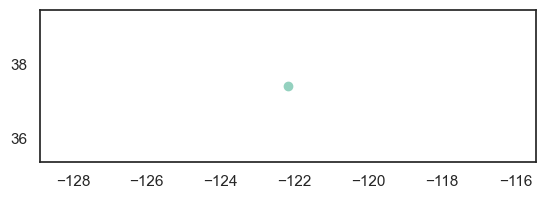

In [91]:
universitites = pois_df[pois_df['university'] == 'computer_lab']
universitites["Coordinates"] = list(zip(universitites["lat"].round(4),universitites["lon"].round(4)))
universitites.plot()

In [122]:
universitites_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)
positions = list(universitites['Coordinates'].unique())
for position in positions:    
    # Create a marker for each station
    marker = folium.Marker(location=position, popup=f'bus station')
    marker.add_to(universitites_map)
    
universitites_map

### school POI

<Axes: >

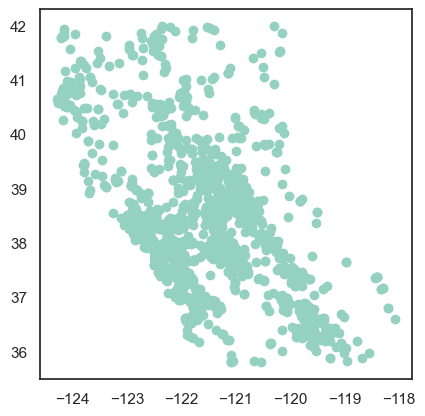

In [104]:
school_df = pois_df[pois_df['amenity'] == 'school']
school.plot()

In [124]:
POI = school_df
POI = POI[(POI["lat"] >= city_bounds["min_lat"]) &(POI["lat"] <= city_bounds["max_lat"]) &
    (POI["lon"] >= city_bounds["min_lon"]) & (POI["lon"] <= city_bounds["max_lon"])]
POI["Coordinates"] = list(zip(POI["lat"].round(4),POI["lon"].round(4)))
POI_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)
positions = list(POI['Coordinates'].unique())
for position in positions:    
    # Create a marker for each station
    marker = folium.Marker(location=position, popup=f'bus station')
    marker.add_to(POI_map)
    
display(POI_map)

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


### bus station POIs

<Axes: >

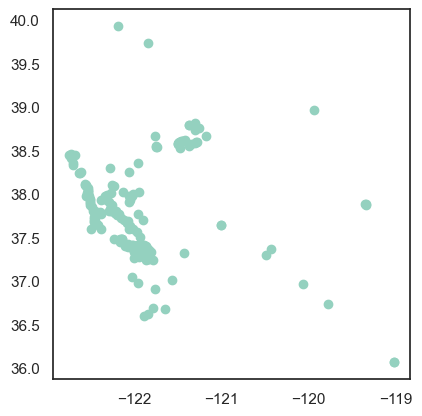

In [71]:
bus_stations = pois_df[pois_df['amenity'] == 'bus_station']
bus_stations.plot()

In [72]:
bus_stations["Coordinates"] = list(zip(bus_stations["lat"].round(4),bus_stations["lon"].round(4)))

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [73]:
bus_stations.head()

,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:country,addr:full,...,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres,Coordinates
154,21,1555983745,0.0,110419188,"{""bus"":""yes"",""network"":""GGT;Marin Transit;SCT;...",37.971140,-122.523160,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(37.9711, -122.5232)"
342,3,1639882968,0.0,276828003,"{""bus"":""yes"",""public_transport"":""station""}",38.543410,-121.738110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(38.5434, -121.7381)"
537,17,1562305953,0.0,301505501,"{""bus"":""yes"",""light_rail"":""yes"",""network"":""Mun...",37.779346,-122.390205,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(37.7793, -122.3902)"
1217,5,1676243074,0.0,317491915,"{""addr:state"":""CA"",""bus"":""yes"",""network"":""VTA;...",37.004444,-121.566880,Gilroy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(37.0044, -121.5669)"
7119,7,1659122633,0.0,366115191,"{""bus"":""yes"",""network"":""VTA;SamTrans;Marguerit...",37.444000,-122.166320,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(37.444, -122.1663)"


In [125]:
POI = bus_stations
POI = POI[(POI["lat"] >= city_bounds["min_lat"]) &(POI["lat"] <= city_bounds["max_lat"]) &
    (POI["lon"] >= city_bounds["min_lon"]) & (POI["lon"] <= city_bounds["max_lon"])]
POI["Coordinates"] = list(zip(POI["lat"].round(4),POI["lon"].round(4)))
POI_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)
positions = list(POI['Coordinates'].unique())
for position in positions:    
    # Create a marker for each station
    marker = folium.Marker(location=position, popup=f'bus station')
    marker.add_to(POI_map)
    
display(POI_map)

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


# Displaying the location of stations

In [75]:
#make a stations_df to use for displaying locations 
columns = ['start_station_id','start_station_lat','start_station_lon']
stations_df = baywheels_df[columns]
stations_df = stations_df.drop_duplicates(subset=['start_station_id'])
stations_df.head()


,start_station_id,start_station_lat,start_station_lon
973541,219,37.809824,-122.280192
761066,202,37.800754,-122.274894
1436517,182,37.809013,-122.268247
979728,178,37.819381,-122.261928
1529805,195,37.812314,-122.260779


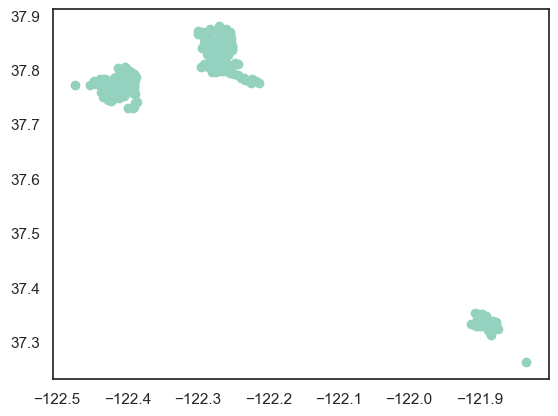

In [117]:
x = stations_df['start_station_lat']
y = stations_df['start_station_lon']
plt.scatter(y,x)

In [76]:
center_map = [37.6, -122.1] #center of our coordinates
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}')
    marker.add_to(stations_map)

stations_map

In [77]:
#try to cluster the stations in three groups
from sklearn.cluster import KMeans

X = stations_df[['start_station_lat','start_station_lon']]

kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X)

# Get the cluster labels for each station
stations_df['area_label'] = kmeans.labels_
stations_df.head()



/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,start_station_id,start_station_lat,start_station_lon,area_label
973541,219,37.809824,-122.280192,0
761066,202,37.800754,-122.274894,0
1436517,182,37.809013,-122.268247,0
979728,178,37.819381,-122.261928,0
1529805,195,37.812314,-122.260779,0


In [78]:
center_map = [37.6, -122.1] #center of our coordinates
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    cluster_label = row['area_label']
    
    # Create a marker for each station with cluster-specific colors
    if cluster_label == 0:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='red'))
    elif cluster_label == 1:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='blue'))
    else:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='green'))
    
    marker.add_to(stations_map)

stations_map

In [79]:
#add the 'cluster_label' to baywheels_df

baywheels_geo = baywheels_geo.merge(stations_df[['start_station_id', 'area_label']], on='start_station_id', how='left')
baywheels_geo

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,Weekday,Is_Weekday,geometry,area_label
0,2018-01-07 08:05:33,2018-01-07 08:11:35,219,37.809824,-122.280192,232,37.806163,-122.276040,11,0 days 00:06:02,NaT,6,1,POINT (-122.28019 37.80982),0
1,2018-01-12 14:06:46,2018-01-12 14:12:42,202,37.800754,-122.274894,182,37.809013,-122.268247,11,0 days 00:05:56,5 days 05:55:11,4,0,POINT (-122.27489 37.80075),0
2,2018-01-12 15:57:16,2018-01-12 16:05:17,182,37.809013,-122.268247,178,37.819381,-122.261928,11,0 days 00:08:01,0 days 01:44:34,4,0,POINT (-122.26825 37.80901),0
3,2018-01-14 11:02:47,2018-01-14 11:08:04,178,37.819381,-122.261928,195,37.812314,-122.260779,11,0 days 00:05:17,1 days 18:57:30,6,1,POINT (-122.26193 37.81938),0
4,2018-01-14 11:48:48,2018-01-14 11:57:23,195,37.812314,-122.260779,215,37.822547,-122.266318,11,0 days 00:08:35,0 days 00:40:44,6,1,POINT (-122.26078 37.81231),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863716,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38,0,0,POINT (-122.38994 37.77289),2
1863717,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45,0,0,POINT (-122.40490 37.78638),2
1863718,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53,0,0,POINT (-122.39043 37.78968),2
1863719,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51,0,0,POINT (-122.41165 37.77372),2


In [80]:
## make a seperate dataframe for each area 
san_jose_df = stations_df[stations_df['area_label'] == 1]

san_fran_df = stations_df[stations_df['area_label'] == 2]

oakland_df = stations_df[stations_df['area_label'] == 0]
oakland_df.head()



,start_station_id,start_station_lat,start_station_lon,area_label
973541,219,37.809824,-122.280192,0
761066,202,37.800754,-122.274894,0
1436517,182,37.809013,-122.268247,0
979728,178,37.819381,-122.261928,0
1529805,195,37.812314,-122.260779,0


In [81]:
#san_fran_df.plot()


In [82]:
center_map = [37.737, -122.43] #center of our coordinates
san_fran_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

for index, row in san_fran_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='green'))
    marker.add_to(san_fran_map)

san_fran_map



In [83]:
san_jose_df.plot

In [84]:
center_map = [37.300964,-121.882016] #center of our coordinates
san_jose_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.3, control_scale=True, max_zoom=20)

for index, row in san_jose_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='blue'))
    marker.add_to(san_jose_map)

san_jose_map


In [85]:
center_map = [37.830824, -122.2801920] #center of our coordinates
oakland_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.3, control_scale=True, max_zoom=20)

for index, row in oakland_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='red'))
    marker.add_to(oakland_map)

oakland_map


In [86]:
#display list of all stations in the corresponding areas
oakland_list = oakland_df['start_station_id'].tolist()
san_jose_list = san_jose_df['start_station_id'].tolist()
san_fran_list = san_fran_df['start_station_id'].tolist()
print('In Oakland are the following stations:', oakland_list)
print('\nIn San Francisco are the following stations:', san_fran_list)
print('\nIn San Jose are the following stations:', san_jose_list)

In Oakland are the following stations: [219, 202, 182, 178, 195, 215, 162, 163, 167, 212, 233, 201, 186, 194, 181, 196, 7, 337, 197, 183, 180, 164, 189, 153, 150, 187, 203, 200, 239, 245, 247, 250, 251, 259, 256, 176, 211, 198, 160, 231, 234, 227, 174, 188, 230, 266, 252, 270, 340, 274, 157, 241, 169, 193, 158, 168, 269, 272, 220, 338, 159, 265, 248, 254, 253, 249, 171, 205, 246, 18, 240, 243, 315, 151, 166, 267, 242, 273, 268, 214, 191, 232, 190, 218, 155, 372, 46, 339, 222, 237, 210, 213, 179, 175, 235, 238, 244, 206, 177, 172, 149, 209, 204, 207, 173, 221, 154, 236, 148, 216, 263, 192, 255, 258, 152, 351, 262, 170, 225, 228, 156, 271, 217, 257, 229, 226, 224]

In San Francisco are the following stations: [60, 324, 37, 53, 5, 25, 66, 74, 21, 49, 133, 137, 36, 28, 16, 17, 27, 24, 30, 44, 81, 93, 285, 34, 19, 6, 323, 22, 107, 129, 119, 89, 122, 26, 90, 114, 80, 130, 141, 97, 3, 42, 41, 116, 72, 15, 14, 58, 78, 43, 98, 105, 120, 75, 79, 13, 95, 33, 67, 4, 86, 23, 342, 20, 29, 59, 125, 1